In [2]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import hopsworks
import pandas as pd

In [4]:
#Connection to hopsworks for feature storage
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/201878
Connected. Call `.close()` to terminate connection gracefully.


In [5]:
#Retrieve the iris dataframe
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
wine_df = pd.read_csv("winequalityN.csv")
wine_df.rename(columns={"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity", "citric acid": "citric_acid", "residual sugar": "residual_sugar", 
                        "free sulfur dioxide": "free_sulfur_dioxide", "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)
#Convert string values to numbers --> white = 0, red = 1
wine_df['type'] = wine_df['type'].replace({'white': 0, 'red': 1})

wine_df

print(wine_df.isna().sum())
#Given that the missing values are not a lot compared to the size of the dataset, we decide to drop them
wine_df = wine_df.dropna()

wine_df

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0        0            7.0             0.270         0.36            20.7   
1        0            6.3             0.300         0.34             1.6   
2        0            8.1             0.280         0.40             6.9   
3        0            7.2             0.230         0.32             8.5   
4        0            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6491     1            6.8             0.620         0.08             1.9   
6492     1            6.2             0.600         0.08             2.0   
6494     1            6.3             0.510         0.13             2.3   
6495     1            5.9             0.645         0.12             2.0   
6496     1            6.0             0.310         0.47             3.6   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6463 rows x 13 columns]

In [5]:
#Look at the types of the data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int64  
 1   fixed_acidity         6463 non-null   float64
 2   volatile_acidity      6463 non-null   float64
 3   citric_acid           6463 non-null   float64
 4   residual_sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free_sulfur_dioxide   6463 non-null   float64
 7   total_sulfur_dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


In [14]:
#Get descriptive statistics
wine_df.describe()

type  fixed_acidity  volatile_acidity  citric_acid  \
count  6463.000000    6463.000000       6463.000000  6463.000000   
mean      0.246480       7.217755          0.339589     0.318758   
std       0.430995       1.297913          0.164639     0.145252   
min       0.000000       3.800000          0.080000     0.000000   
25%       0.000000       6.400000          0.230000     0.250000   
50%       0.000000       7.000000          0.290000     0.310000   
75%       0.000000       7.700000          0.400000     0.390000   
max       1.000000      15.900000          1.580000     1.660000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     6463.000000  6463.000000          6463.000000           6463.000000   
mean         5.443958     0.056056            30.516865            115.694492   
std          4.756852     0.035076            17.758815             56.526736   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             77.000000   
50%          3.000000     0.047000            29.000000            118.000000   
75%          8.100000     0.065000            41.000000            156.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           pH    sulphates      alcohol      quality  
count  6463.000000  6463.000000  6463.000000  6463.000000  6463.000000  
mean      0.994698     3.218332     0.531150    10.492825     5.818505  
std       0.003001     0.160650     0.148913     1.193128     0.873286  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.992330     3.110000     0.430000     9.500000     5.000000  
50%       0.994890     3.210000     0.510000    10.300000     6.000000  
75%       0.997000     3.320000     0.600000    11.300000     6.000000  
max       1.038980     4.010000     2.000000    14.900000     9.000000

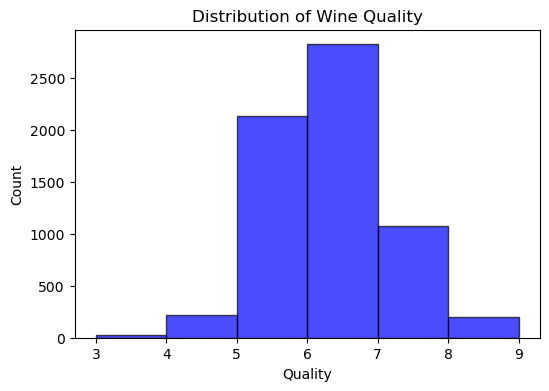

In [27]:
plt.figure(figsize=(6, 4))
plt.hist(wine_df['quality'], bins=range(3, 10), edgecolor='black', color='blue', alpha=0.7)

plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.show()

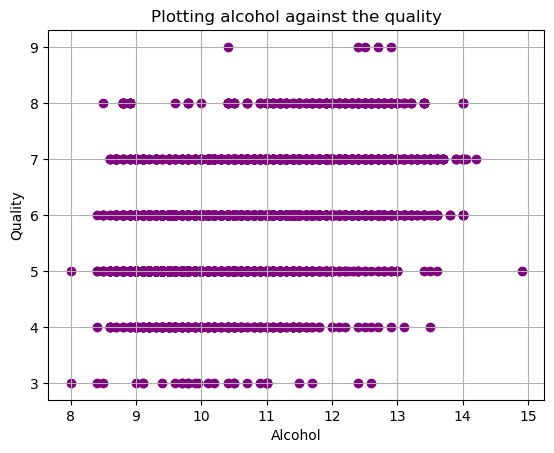

In [29]:
#Plot a scatter plot of alcohol against its quality
plt.scatter(wine_df['alcohol'],wine_df['quality'], color='purple')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Plotting alcohol against the quality')
plt.grid(True)
plt.show()

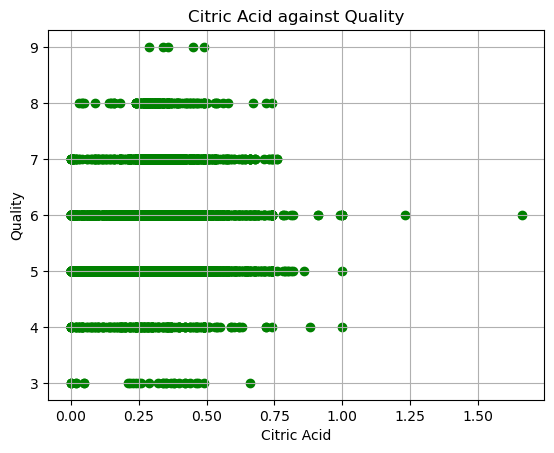

In [37]:
#Plotting volatile acidity against quality
import matplotlib.pyplot as plt
plt.scatter(wine_df['citric_acid'],wine_df['quality'], color='green')
plt.xlabel('Citric Acid')
plt.ylabel('Quality')
plt.title('Citric Acid against Quality')
plt.grid(True)
plt.show()

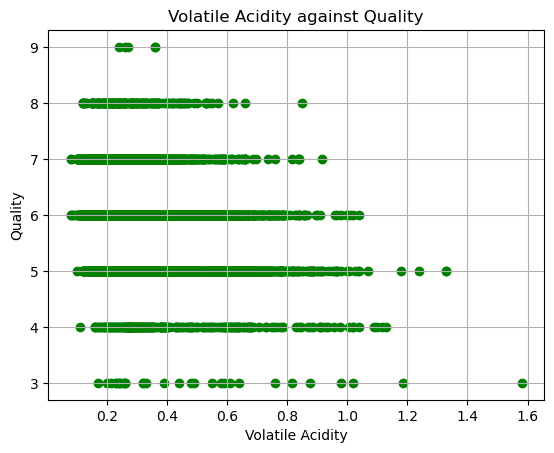

In [38]:
#Plotting volatile acidity against quality
import matplotlib.pyplot as plt
plt.scatter(wine_df['volatile_acidity'],wine_df['quality'], color='green')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity against Quality')
plt.grid(True)
plt.show()

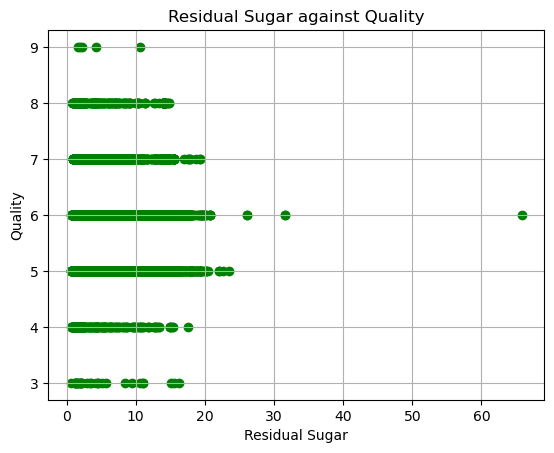

In [39]:
#Plotting volatile acidity against quality
import matplotlib.pyplot as plt
plt.scatter(wine_df['residual_sugar'],wine_df['quality'], color='green')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.title('Residual Sugar against Quality')
plt.grid(True)
plt.show()

From the previous plots we can see that there is no linear relationship between the target and the features

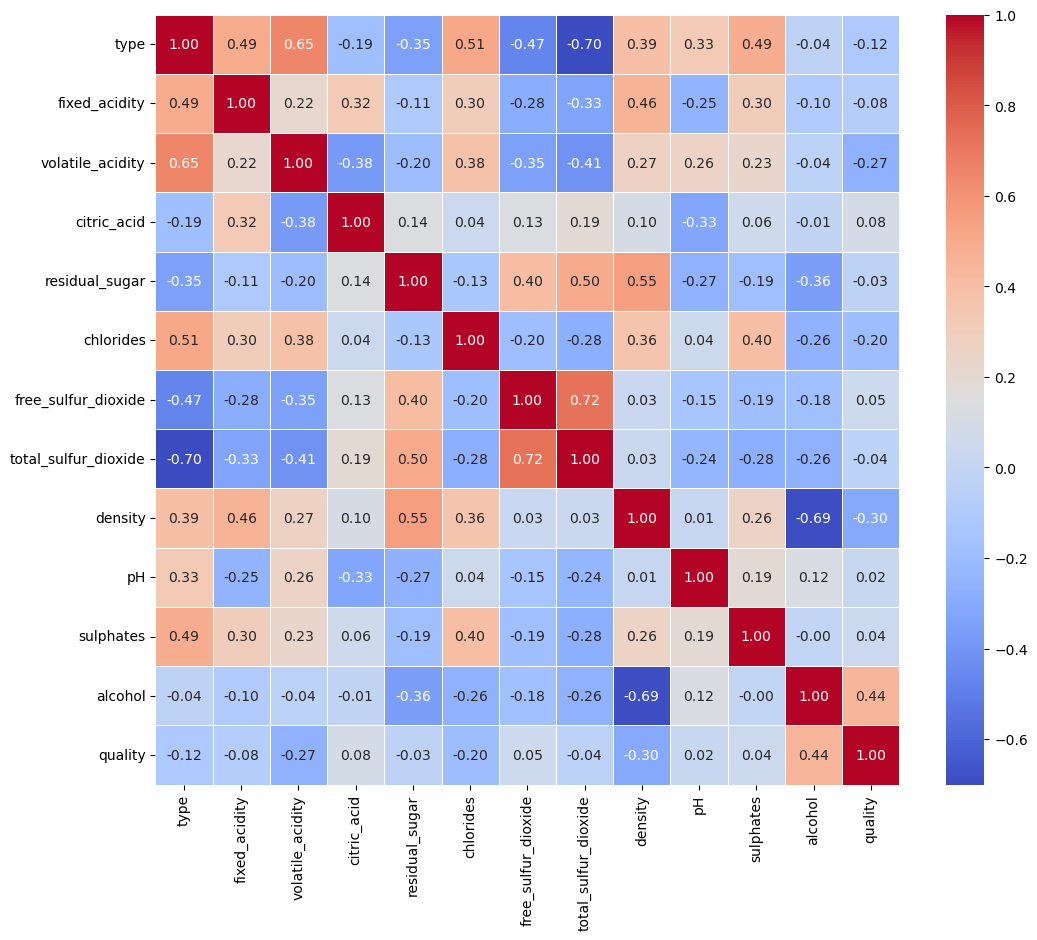

In [15]:
numerical_df = wine_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap --> to visualize the relationships between numerical features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

We see that quality has positive relation with many features but the strongest correlation is with alcohol among all.

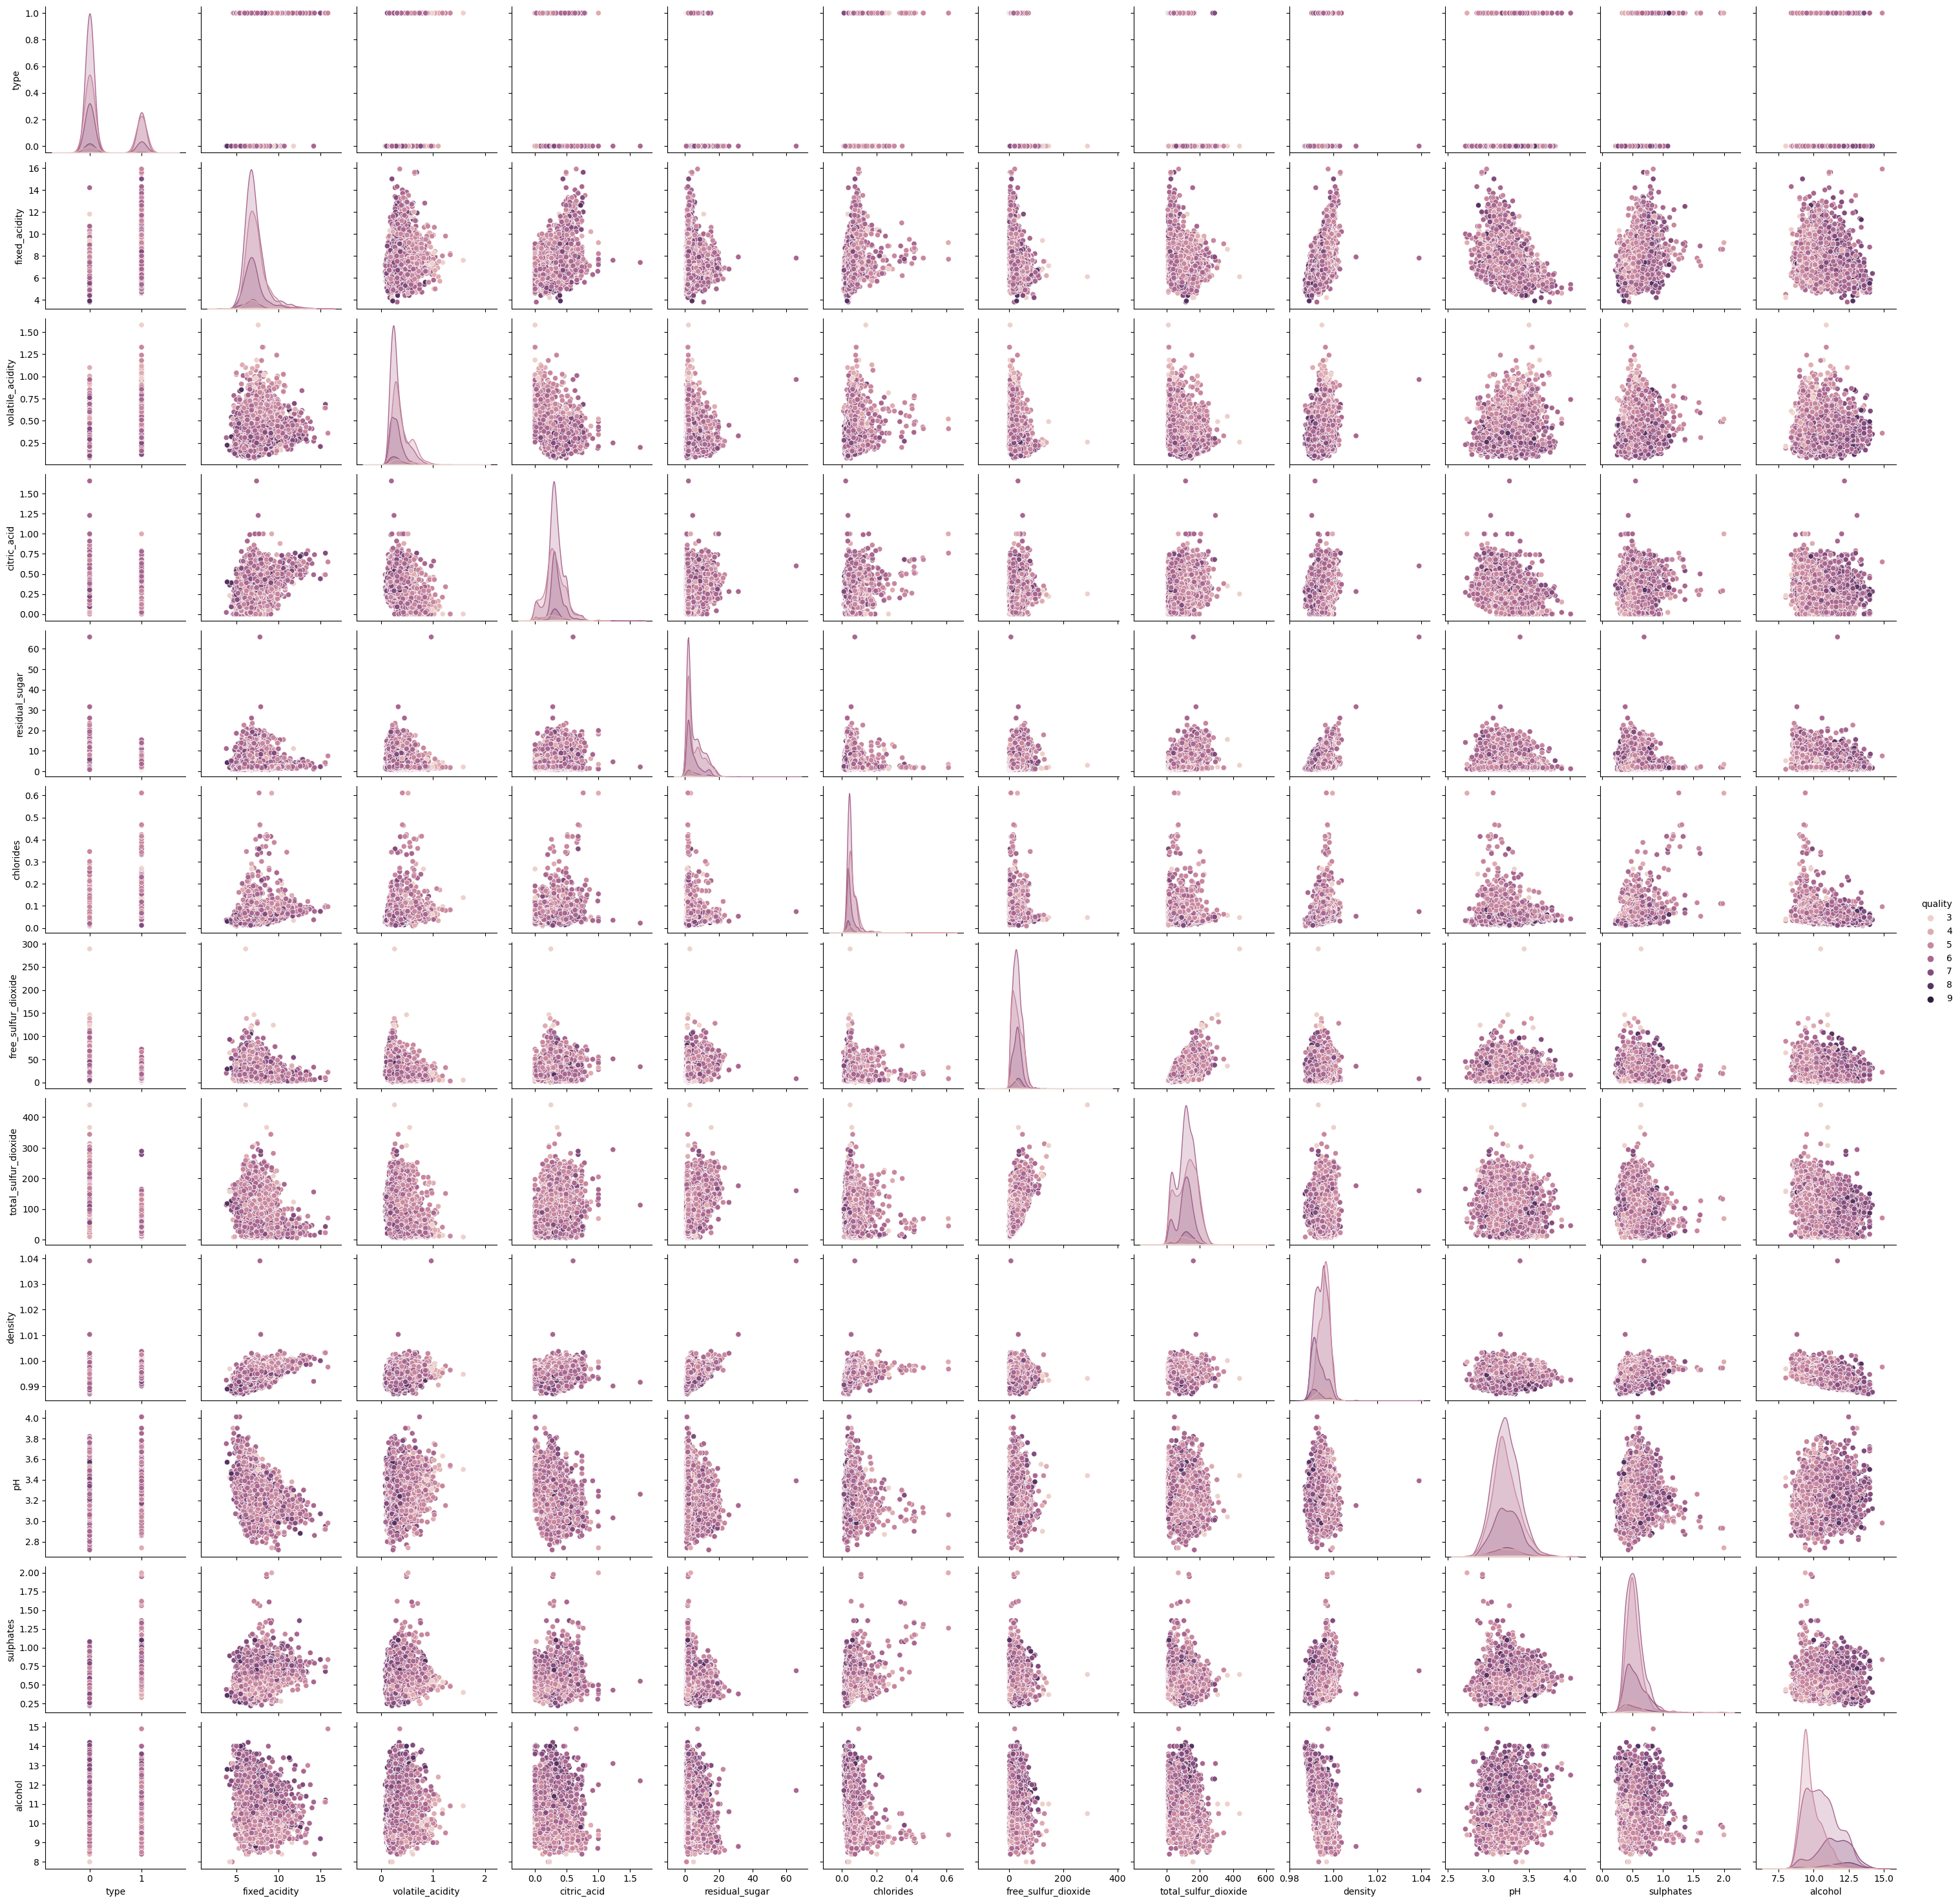

In [33]:
sns.pairplot(data=wine_df,hue='quality')

In [8]:
#Now we write our historical feature values and labels to a feature group (backfilling)
#Insert the dataframe into the feature store
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["type", "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"], 
    description="Wine dataset")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/201878/fs/201797/fg/209265


Uploading Dataframe: 100.00% |███████████████████████████| Rows 6463/6463 | Elapsed Time: 00:06 | Remaining Time: 00:00


Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/201878/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x189955abdd0>, None)

In [9]:
#The code below will prevent wine data from being written to 
#your feature group if you write values outside the expected ranges.
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [10]:
suite = ExpectationSuite(expectation_suite_name="wine_values")

expect(suite, "fixed_acidity", 15.9, 3.8)
expect(suite, "volatile_acidity", 1.58, 0.08)
expect(suite, "citric_acid", 1.66, 0)
expect(suite, "residual_sugar", 65.8, 0.6)
expect(suite, "chlorides", 0.611, 0.009)
expect(suite, "free_sulfur_dioxide", 289, 1)
expect(suite, "total_sulfur_dioxide", 440, 6)
expect(suite, "density", 1.03898, 0.98711)
expect(suite, "ph", 4.01, 2.72)
expect(suite, "sulphates", 2, 0.22)
expect(suite, "alcohol", 14.9, 8)

wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT") 

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/201878/fs/201797/fg/209265
